Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.56123665 0.28884587]
 [0.18376568 0.50996127]
 [0.84840219 0.11010926]]
[-0.85974981 -0.07579375  0.60370101  0.5314064   0.00523698]
[74 61 19 73 99 52 80 38 99 54]
[9 2 6]
[-1.21266796  1.08591983  0.3715818  -0.72214924 -0.46359327  1.71663117
  2.23674314  1.34936513 -0.52473267  0.96551169]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

# Using pandas
start_time_pandas = time.time()
df = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['RandomNumber'])
pandas_time = time.time() - start_time_pandas

# Using NumPy
start_time_numpy = time.time()
array = np.random.randint(1, 101, size=1000000)
numpy_time = time.time() - start_time_numpy

# Output the results
print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"NumPy time: {numpy_time:.4f} seconds")

# Faster method
if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas time: 0.0260 seconds
NumPy time: 0.0144 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [10]:
import pandas as pd
import numpy as np
import time

# Load the dataset
dataset_path = r'D:\project\NGEX6\sleep_health.csv'  # Use a raw string for Windows paths

# Step 1: Using pandas
start_time_pandas = time.time()
df = pd.read_csv(dataset_path)

# Ensure the required columns exist
print("Columns in DataFrame:", df.columns)

# Calculate mean using pandas
pandas_means = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
pandas_time_step1 = time.time() - start_time_pandas

# Step 2: Using NumPy
start_time_numpy = time.time()
data = np.genfromtxt(dataset_path, delimiter=',', skip_header=1)
# Adjust indices based on your data
numpy_means = np.mean(data[:, [4, 9, 10, 11, 12]], axis=0)  # Column indices for Sleep Duration, Systolic, Diastolic, Heart Rate, Daily Steps
numpy_time_step2 = time.time() - start_time_numpy

# Step 3: Using pandas for correlation
start_time_pandas_corr = time.time()
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_df = numerical_df.corr()
sleep_age_corr = correlation_df['Sleep Duration']['Age'] if 'Age' in correlation_df else None
sleep_hr_corr = correlation_df['Sleep Duration']['Heart Rate'] if 'Heart Rate' in correlation_df else None
sleep_steps_corr = correlation_df['Sleep Duration']['Daily Steps'] if 'Daily Steps' in correlation_df else None
pandas_time_step3 = time.time() - start_time_pandas_corr

# Step 4: Using NumPy for correlation
start_time_numpy_corr = time.time()
correlation_matrix = np.corrcoef(data[:, [4, 2, 11, 12]].T)  # Adjust indices for Sleep Duration, Age, Heart Rate, Daily Steps
sleep_age_corr_numpy = correlation_matrix[0, 1]  # Adjust as necessary
sleep_hr_corr_numpy = correlation_matrix[0, 2]
sleep_steps_corr_numpy = correlation_matrix[0, 3]
numpy_time_step4 = time.time() - start_time_numpy_corr

# Step 5: Standard deviation using pandas
start_time_pandas_std = time.time()
pandas_std = df['Sleep Duration'].std()
pandas_time_step5 = time.time() - start_time_pandas_std

# Step 6: Standard deviation using NumPy
start_time_numpy_std = time.time()
numpy_std = np.std(data[:, 4])  # Adjust index accordingly
numpy_time_step6 = time.time() - start_time_numpy_std

# Total time for pandas and NumPy
total_time_pandas = (pandas_time_step1 + pandas_time_step3 + pandas_time_step5)
total_time_numpy = (numpy_time_step2 + numpy_time_step4 + numpy_time_step6)

# Output relevant results
print("Pandas means:\n", pandas_means)
print("NumPy means:\n", numpy_means)
print("Pandas correlation with Age:", sleep_age_corr)
print("NumPy correlation with Age:", sleep_age_corr_numpy)
print("Total time for pandas:", total_time_pandas)
print("Total time for NumPy:", total_time_numpy)

# Check which is faster
if total_time_pandas < total_time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Columns in DataFrame: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')
Pandas means:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy means:
 [   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
Pandas correlation with Age: 0.3447093581647443
NumPy correlation with Age: 0.34470935816474385
Total time for pandas: 0.014510869979858398
Total time for NumPy: 0.01398777961730957
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

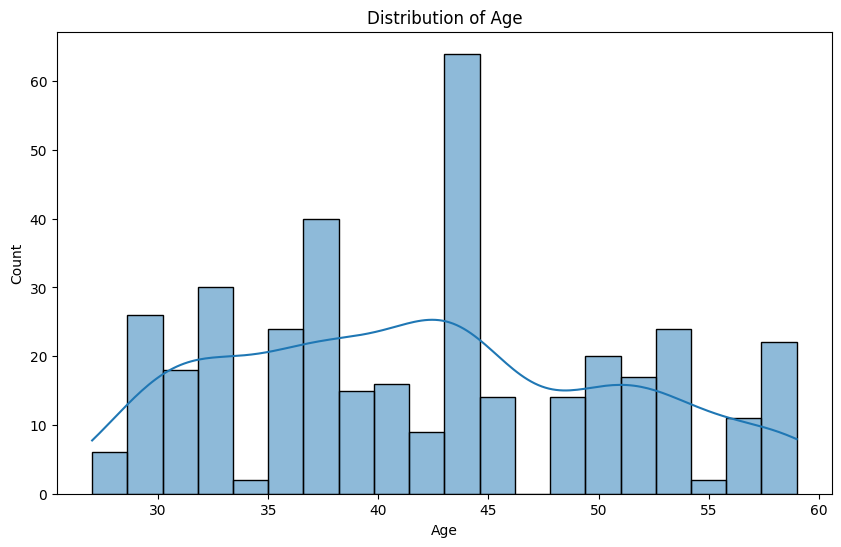

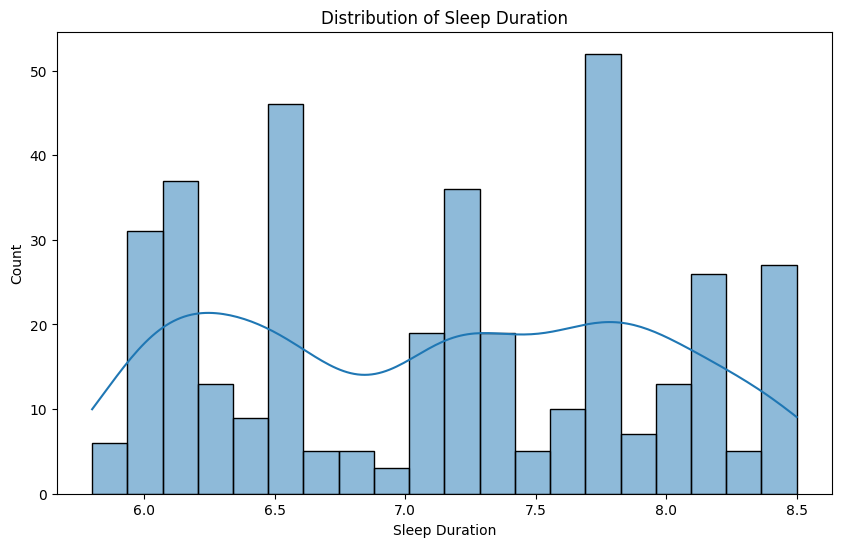

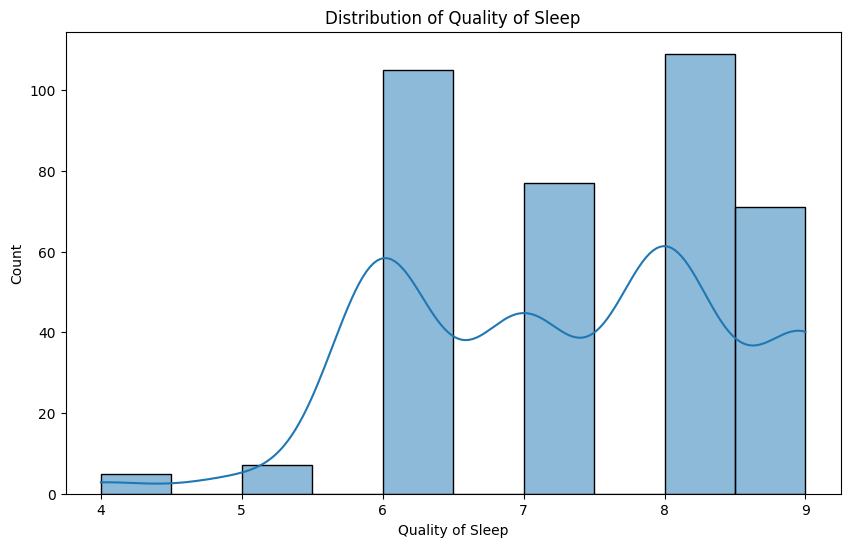

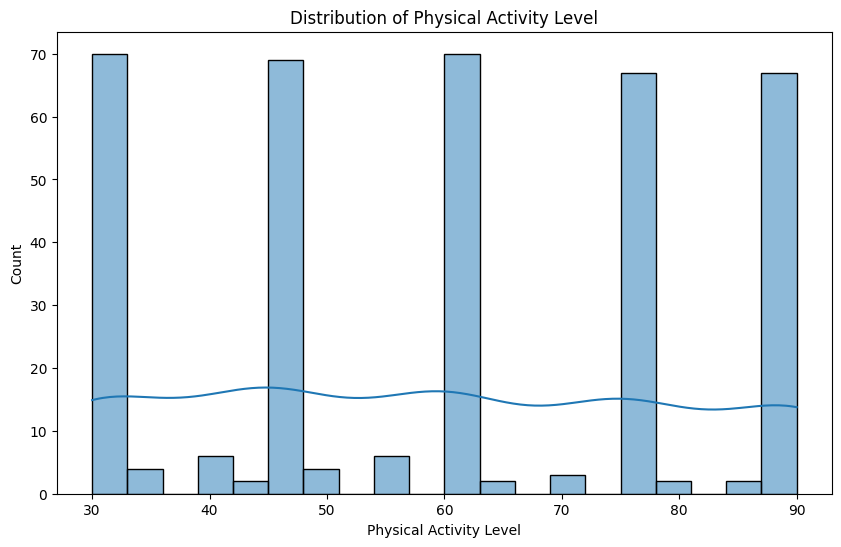

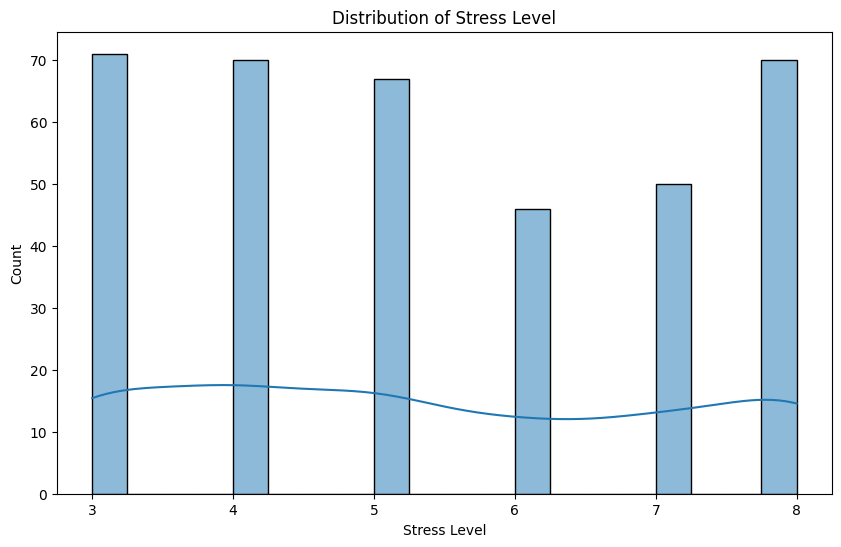

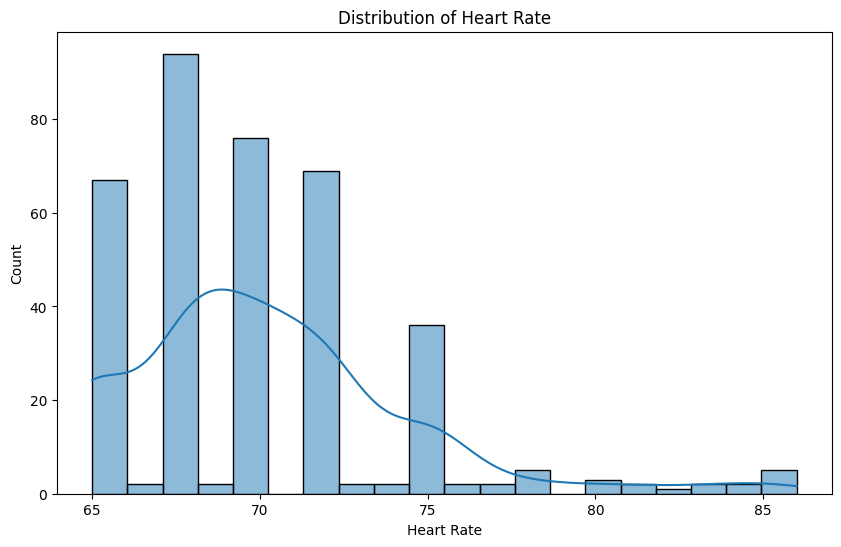

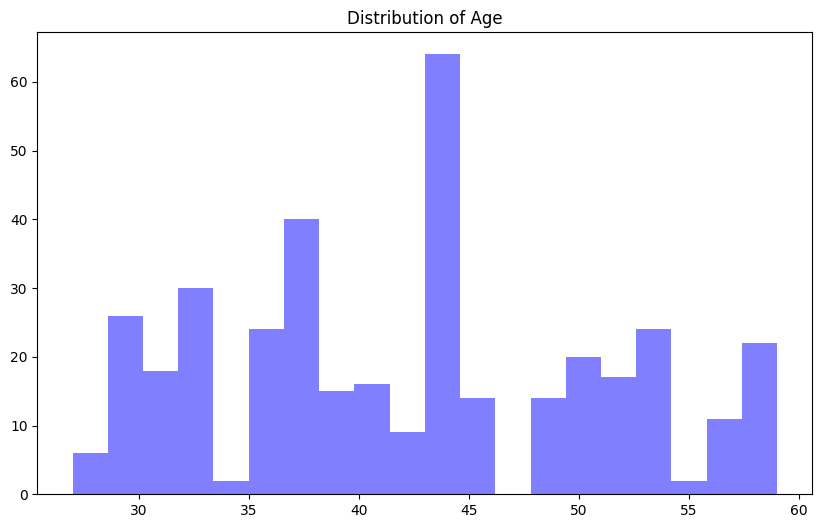

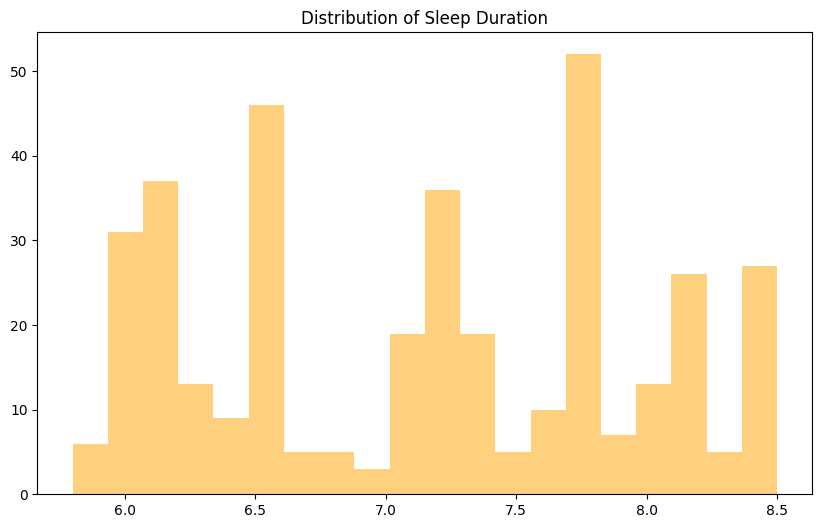

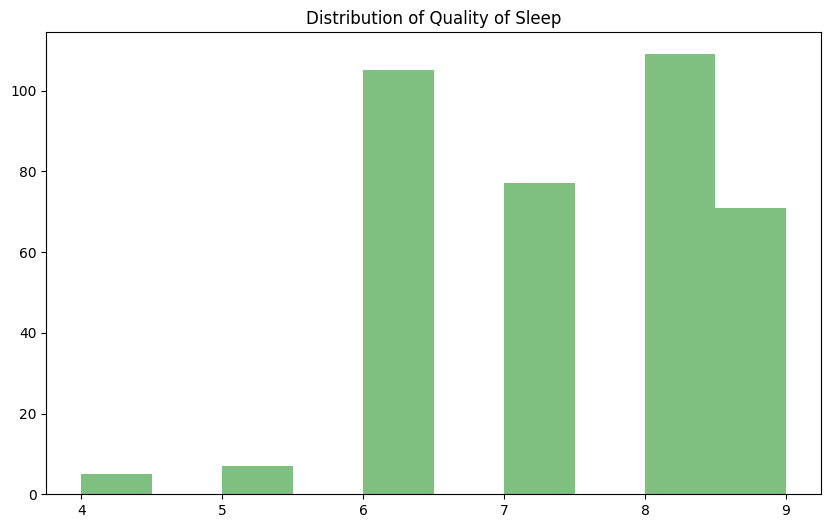

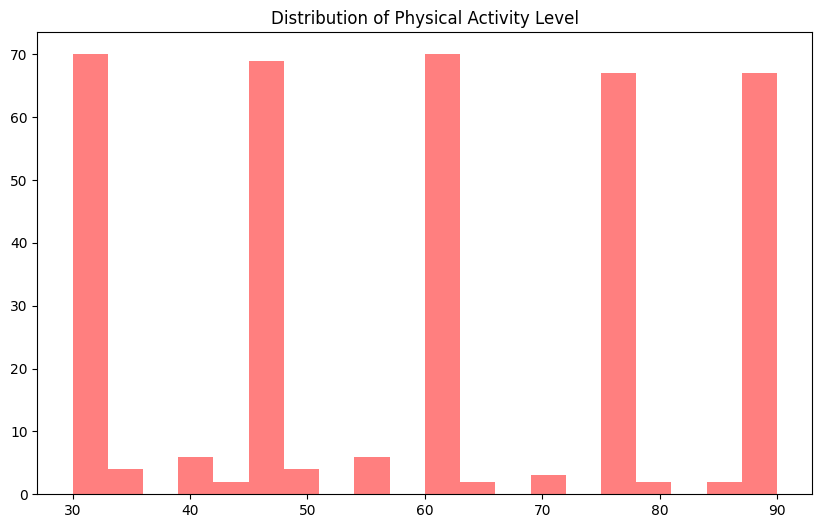

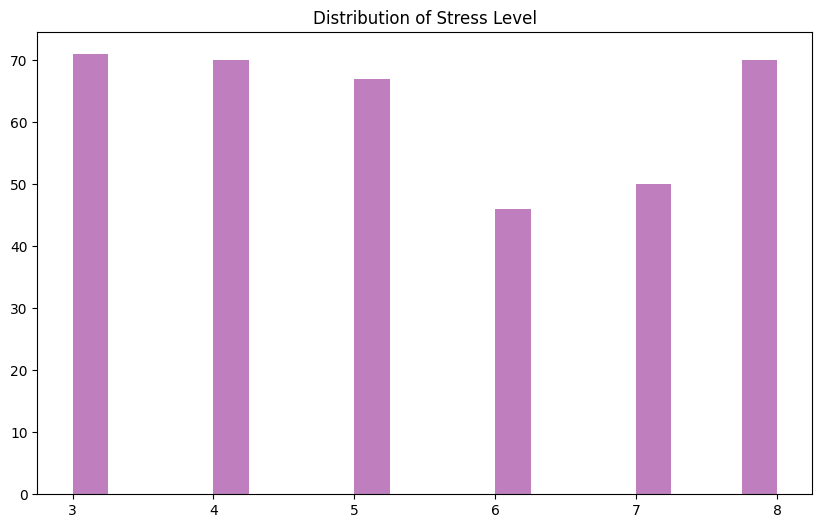

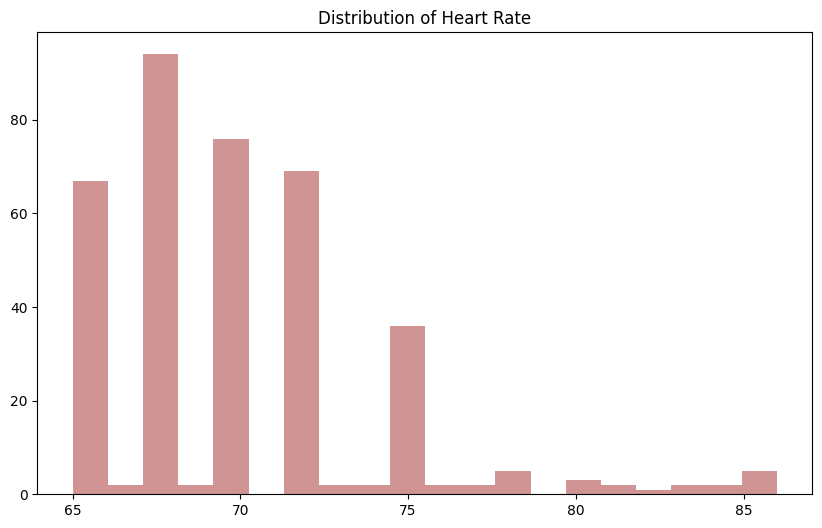

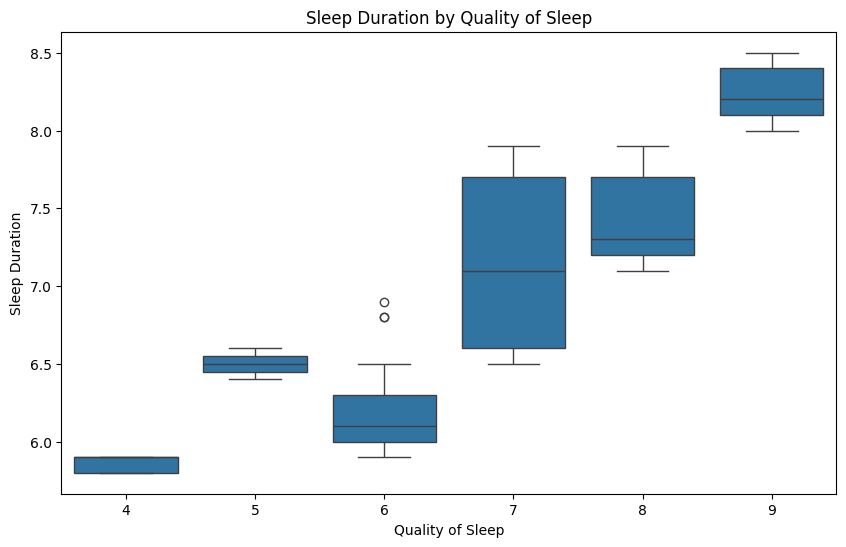

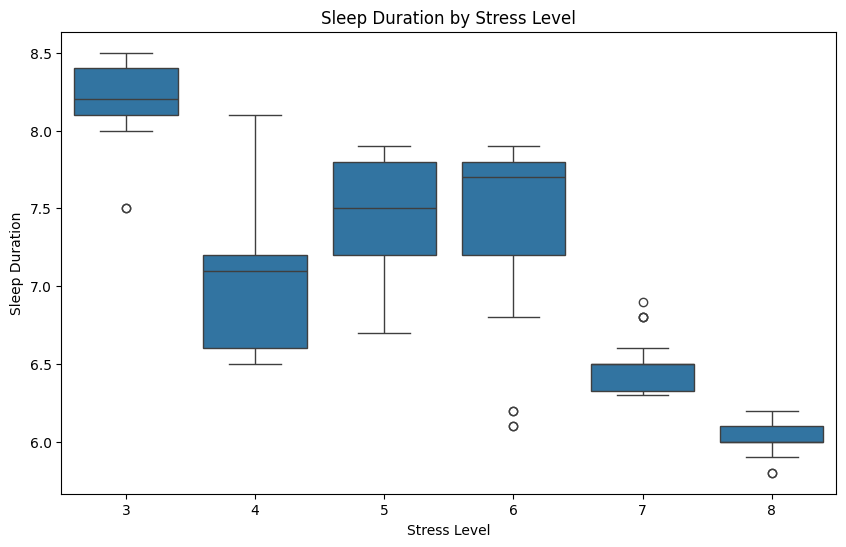

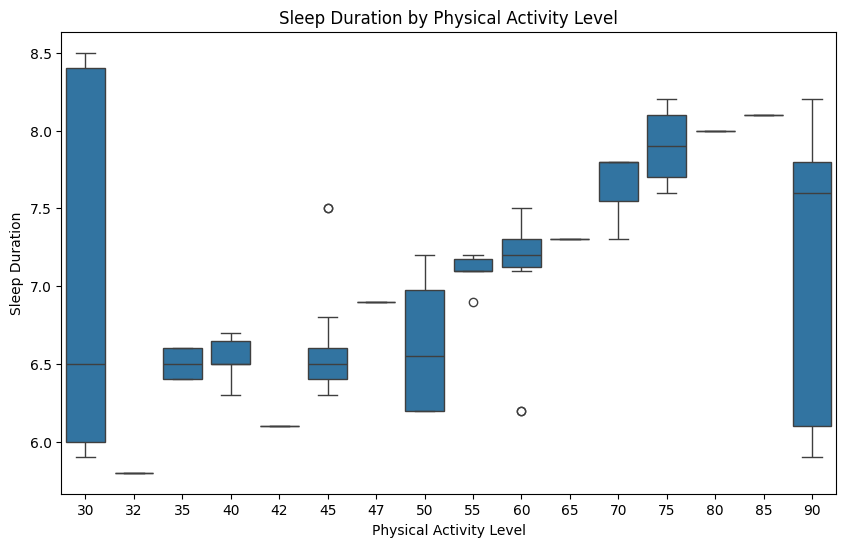

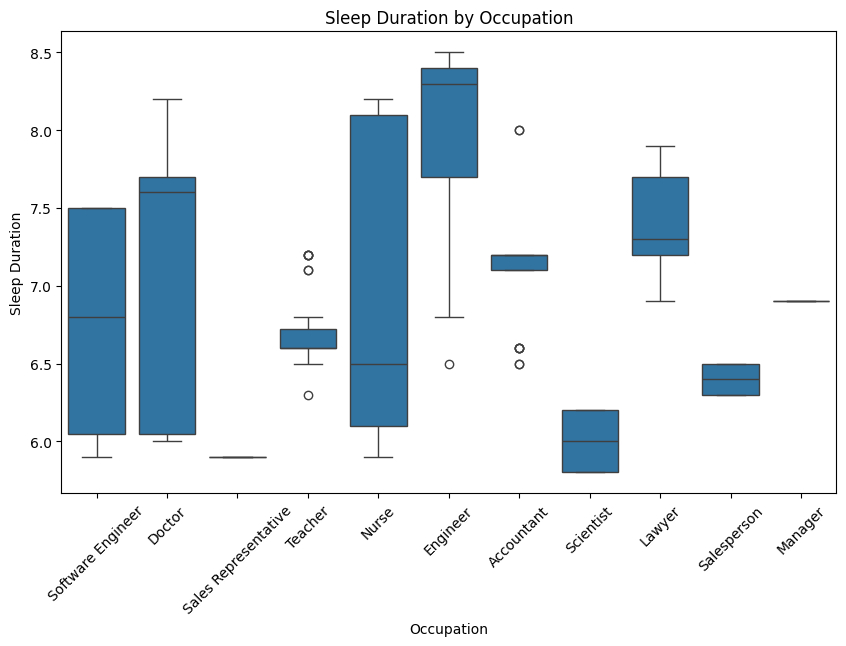

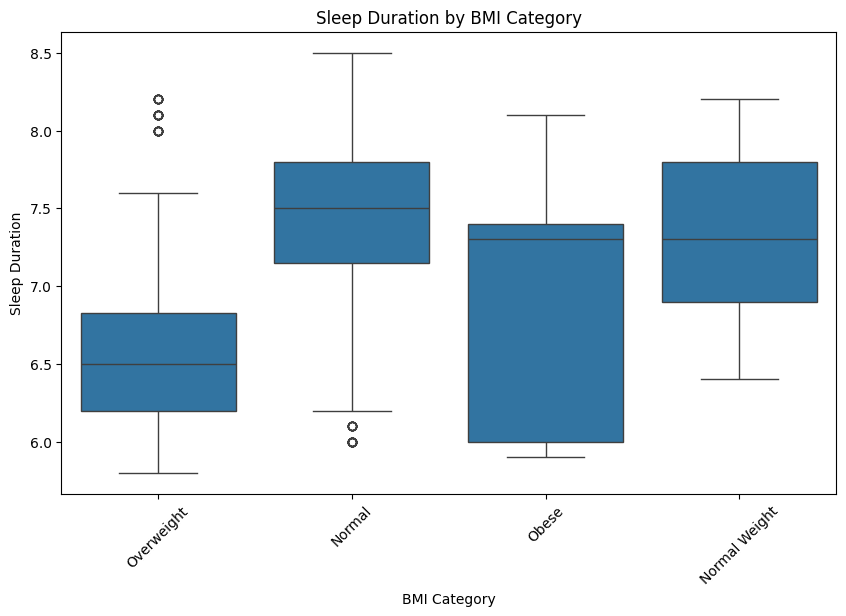

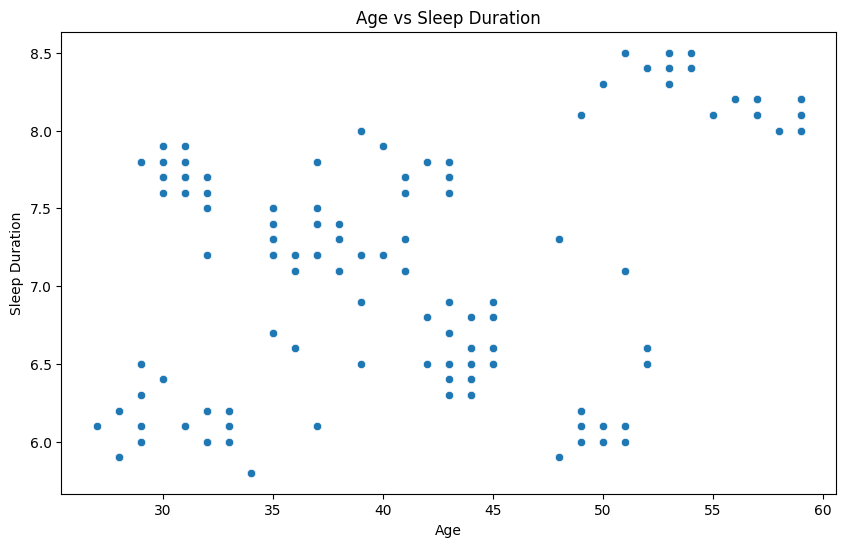

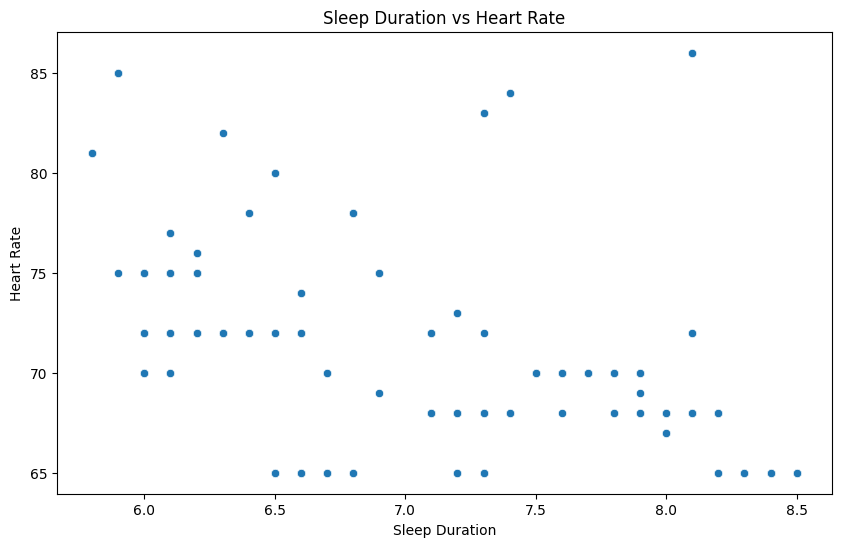

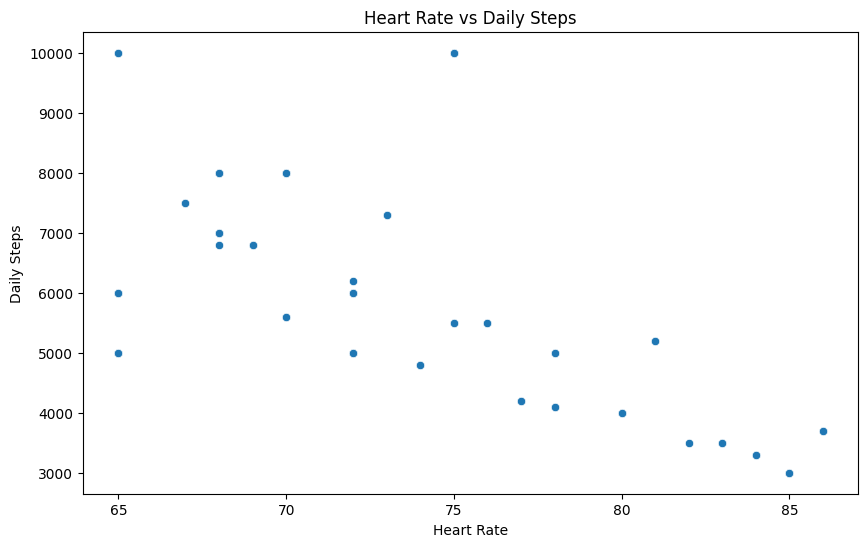

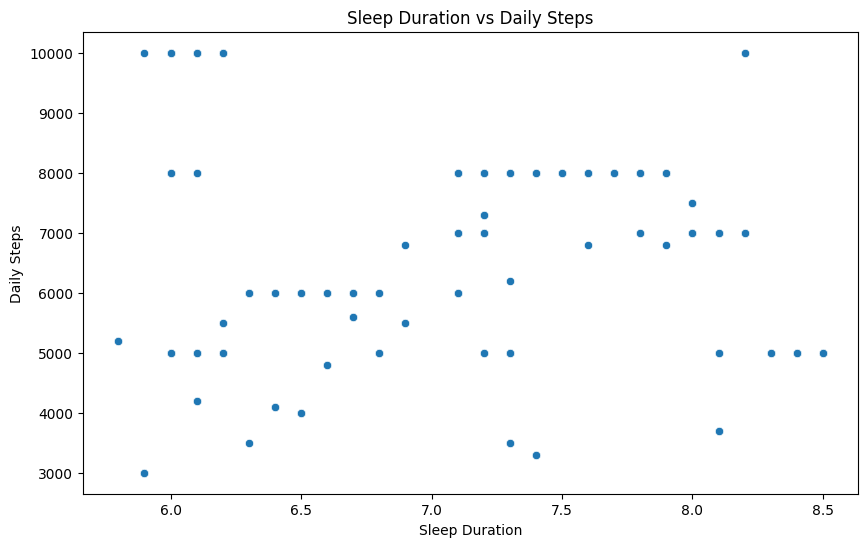

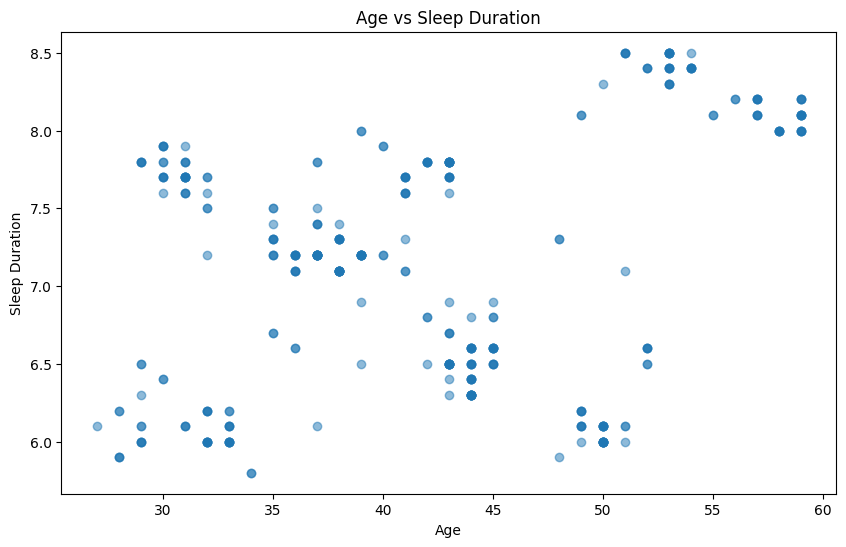

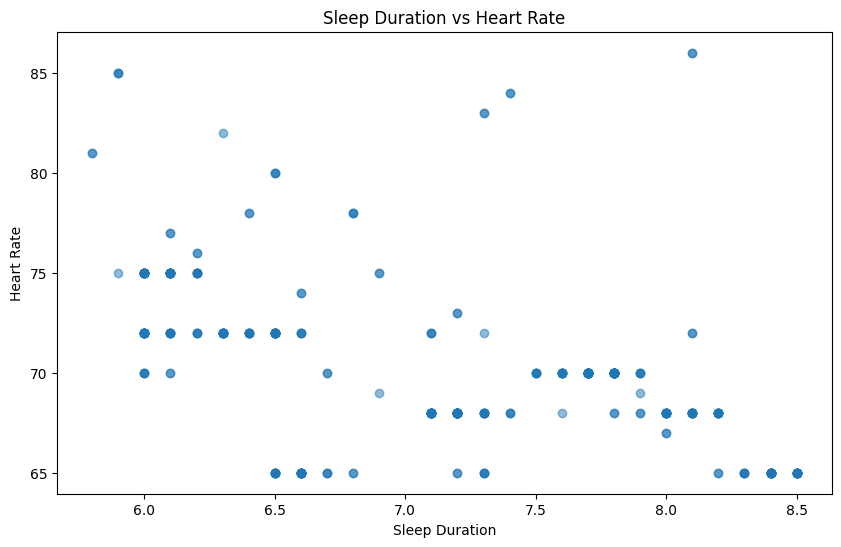

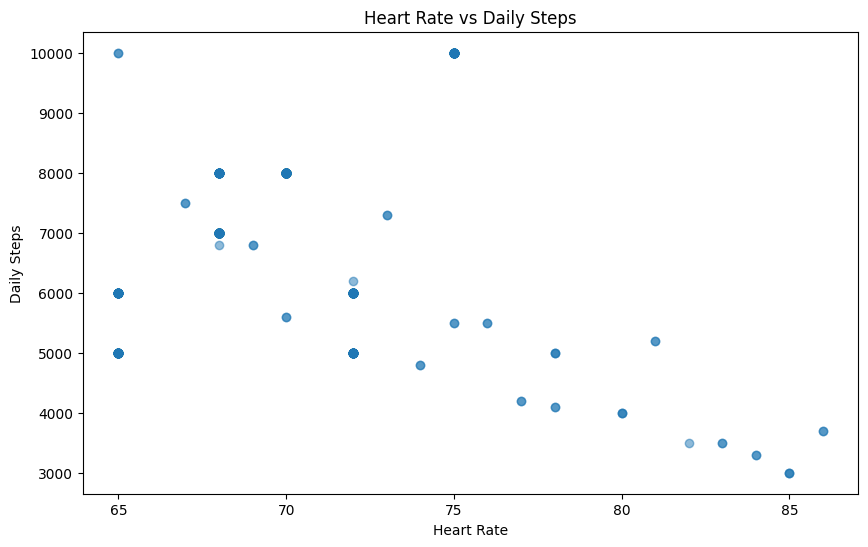

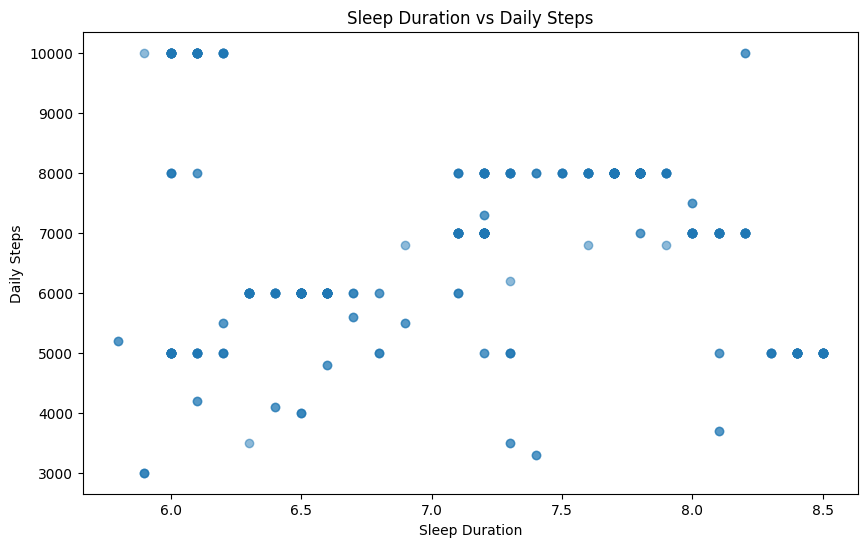

Total time for pandas plotting: 1.609391450881958
Total time for NumPy plotting: 1.333003282546997


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the dataset
dataset_path = r'D:\project\NGEX6\sleep_health.csv'
df = pd.read_csv(dataset_path)

# 1. Using only pandas to plot distributions
# 1.1. Age
start_time_pandas = time.time()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# 1.2. Sleep Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.show()

# 1.3. Quality of Sleep
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=10, kde=True)
plt.title('Distribution of Quality of Sleep')
plt.show()

# 1.4. Physical Activity Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], bins=20, kde=True)
plt.title('Distribution of Physical Activity Level')
plt.show()

# 1.5. Stress Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], bins=20, kde=True)
plt.title('Distribution of Stress Level')
plt.show()

# 1.6. Heart Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=20, kde=True)
plt.title('Distribution of Heart Rate')
plt.show()
pandas_time_total = time.time() - start_time_pandas

# 2. Using only NumPy to plot distributions
start_time_numpy = time.time()

# 2.1. Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, alpha=0.5, label='Age', color='blue')
plt.title('Distribution of Age')
plt.show()

# 2.2. Sleep Duration
plt.figure(figsize=(10, 6))
plt.hist(df['Sleep Duration'], bins=20, alpha=0.5, label='Sleep Duration', color='orange')
plt.title('Distribution of Sleep Duration')
plt.show()

# 2.3. Quality of Sleep
plt.figure(figsize=(10, 6))
plt.hist(df['Quality of Sleep'], bins=10, alpha=0.5, label='Quality of Sleep', color='green')
plt.title('Distribution of Quality of Sleep')
plt.show()

# 2.4. Physical Activity Level
plt.figure(figsize=(10, 6))
plt.hist(df['Physical Activity Level'], bins=20, alpha=0.5, label='Physical Activity Level', color='red')
plt.title('Distribution of Physical Activity Level')
plt.show()

# 2.5. Stress Level
plt.figure(figsize=(10, 6))
plt.hist(df['Stress Level'], bins=20, alpha=0.5, label='Stress Level', color='purple')
plt.title('Distribution of Stress Level')
plt.show()

# 2.6. Heart Rate
plt.figure(figsize=(10, 6))
plt.hist(df['Heart Rate'], bins=20, alpha=0.5, label='Heart Rate', color='brown')
plt.title('Distribution of Heart Rate')
plt.show()
numpy_time_total = time.time() - start_time_numpy

# 3. Distribution of Sleep Duration based on categories
# 3.1. Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

# 3.2. Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.show()

# 3.3. Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.show()

# 3.4. Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)
plt.show()

# 3.5. BMI
plt.figure(figsize=(10, 6))
df['BMI Category'] = df['BMI Category'].astype(str)  # Convert to string for plotting
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration by BMI Category')
plt.xticks(rotation=45)
plt.show()

# 4. Using only NumPy for Step 3
# This will involve manual calculations and plotting
# Example for Sleep Duration by Quality of Sleep
# You'll need to create separate arrays for each category and then plot them.

# (Implement similar box plots as done in pandas but using NumPy arrays)

# 5. Using pandas to see relationships
# 5.1. Age and Sleep Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.show()

# 5.2. Sleep Duration and Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.show()

# 5.3. Heart Rate and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.show()

# 5.4. Sleep Duration and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.show()

# 6. Using NumPy to plot relationships
# 6.1. Age and Sleep Duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

# 6.2. Sleep Duration and Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep Duration'], df['Heart Rate'], alpha=0.5)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

# 6.3. Heart Rate and Daily Steps
plt.figure(figsize=(10, 6))
plt.scatter(df['Heart Rate'], df['Daily Steps'], alpha=0.5)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

# 6.4. Sleep Duration and Daily Steps
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep Duration'], df['Daily Steps'], alpha=0.5)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()

# 7. Calculate time difference between plotting using pandas and NumPy
print("Total time for pandas plotting:", pandas_time_total)
print("Total time for NumPy plotting:", numpy_time_total)


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

